# Linear Regression

A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term)

$$\hat y = \theta_0 + \theta_1x_1 + \theta_2x_2 + \cdot \cdot \cdot + \theta_nx_n$$

* $\hat y$ is the predicted value

* $n$ is the number of features

* $x_i$ is the $i^{th}$ feature value

* $\theta_j$ is the $j^{th}$ model parameter

This can be written much more concisely using a vectorized form

$$\hat y = h_\theta(x) = \theta \cdot x$$

* $\theta$ is the model’s parameter vector, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$

* $x$ is the instance’s feature vector, containing $x_0$ to $x_n$, with $x_0$ always equal to 1

* $\theta \cdot x$ is the dot product of the vectors $\theta$ and $x$, which is of course equal to $\theta_0x_0 + \theta_1x_1 + \cdot \cdot \cdot + \theta_nx_n$

* $h_0$ is the hypothesis function, using the model parameters $\theta$

We first need a measure of how well (or poorly) the model fits the training data. In Chapter 2 we saw that the most common performance measure of a regression model is the Root Mean Square Error (RMSE). Therefore, to train a Linear Regression model, you need to find the value of $\theta$ that minimizes the RMSE

In practice, it is simpler to minimize the Mean Square Error (MSE) than the RMSE, and it leads to the same result (because the value that minimizes a function also minimizes its square root)

The MSE of a Linear Regression hypothesis $h_0$ on a training set X is calculated using MSE cost function for a Linear Regression model

$$ MSE(X,h_\theta) = {1\over{m}} \sum_{i =1 }^m(\theta^{T}x^{(i)} - y^{(i)})^2  $$

## The Normal Equation

To find the value of $\theta$ that minimizes the cost function, there is a closed-form solution —in other words, a mathematical equation that gives the result directly. This is called the Normal Equation

Normal Equation
$$ \hat\theta = (X^T X)^{-1} X^T y $$

* $\hat \theta$ is the value of $\theta$ that minimizes the cost function

* $y$ is the vector of target values containing $y^{(1)}$ to $y^{(m)}$

Let’s generate some linear-looking data to test this equation

In [ ]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

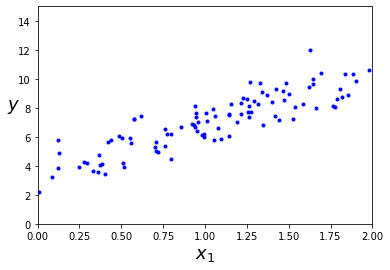

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Now let’s compute $\hat \theta$ using the Normal Equation. We will use the function from inv() NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix multiplication 

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The actual function that we used to generate the data is $y = 4 + 3x_1$ + Gaussian noise. Let’s see what the equation found

In [ ]:
theta_best

array([[3.46568373],
       [3.455855  ]])

We would have hoped for $θ_0 = 4$ and $θ_1 = 3$ instead of $θ_0 = 4.215$ and $θ_1 = 2.770$. Close enough, but the noise made it impossible to recover the exact parameters of the original function

Now you can make predictions using $\hat \theta$

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.46568373],
       [10.37739373]])

Let’s plot this model’s predictions

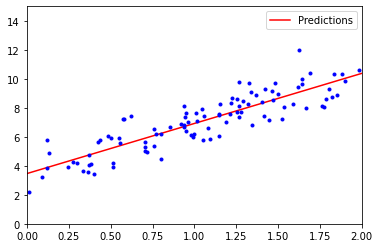

In [ ]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.legend(['Predictions'])
plt.show()

Performing linear regression using Scikit-Learn is quite simple

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.46568373]), array([[3.455855]]))

In [ ]:
lin_reg.predict(X_new)

array([[ 3.46568373],
       [10.37739373]])

The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for “least squares”), which you could call directly

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.46568373],
       [3.455855  ]])

This function computes $\hat \theta = X^+ y$, 
where $X^+$ is the pseudoinverse of $X$ (specifically the Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse directly

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[3.46568373],
       [3.455855  ]])

The pseudoinverse itself is computed using a standard matrix factorization technique called Singular Value Decomposition (SVD) that can decompose the training set matrix $X$ into the matrix multiplication of three matrices $U \Sigma V^T$ (see numpy.linalg.svd())

The pseudoinverse is computed as $X^+ = V\Sigma U^T$. To compute the matrix $\Sigma^+$, the algorithm takes $\Sigma$ and sets to zero all values smaller than a tiny threshold value, then it replaces all the non-zero values with their inverse, and finally it transposes the resulting matrix.

This approach is more efficient than computing the Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may not work if the matrix $X^T X$ is not invertible (i.e., singular), such as if $m < n$ or if some features are redundant, but the pseudoinverse is always defined



# Gradient Descent

The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function

it measures the local gradient of the error function with regards to the parameter vector θ, and it goes in the direction of descending gradient. Once the gra dient is zero, you have reached a minimum

<p align='center'>
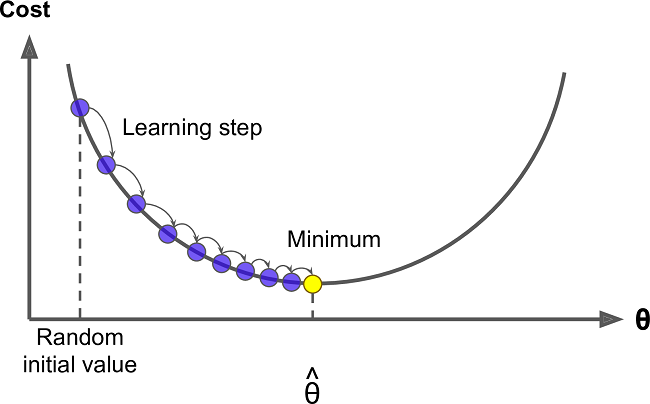

An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time

<p align='center'>
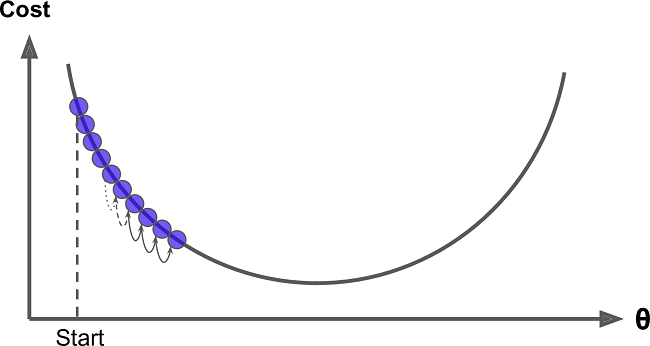
</p>

On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution

<p align='center'>
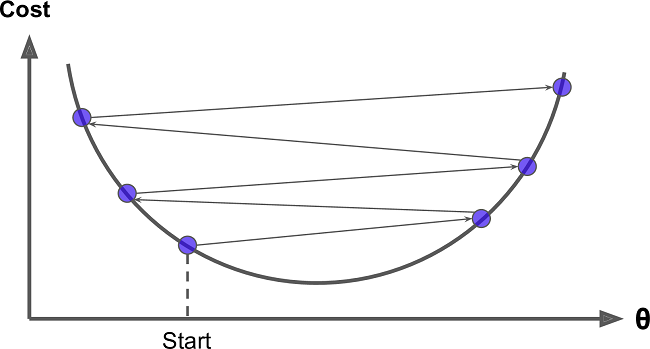
</p>

## Batch Gradient Descent

To implement Gradient Descent, you need to compute the gradient of the cost func tion with regards to each model parameter $θ_j$. In other words, you need to calculate how much the cost function will change if you change $θ_j$ just a little bit. This is called
a partial derivative



Partial derivatives of the cost function
$${\delta\over \delta \theta_j} MSE(θ) = {2 \over m} {\sum_{i=1}^m} (θ^T x^{(i)} - y^{(i)}) x_j^{(i)}$$

Instead of computing these partial derivatives individually, you can use Equation below to compute them all in one go

The gradient vector, noted
$∇_θ MSE(θ)$, contains all the partial derivatives of the cost function (one for each model parameter)

Gradient vector of the cost function

$$ ∇_\theta MSE(\theta) = \begin{pmatrix} {\delta\over \delta \theta_0} MSE(θ) \\ {\delta\over \delta \theta_1} MSE(θ) \\ \vdots \\ {\delta\over \delta \theta_n} MSE(θ)  \end{pmatrix} = {2\over m} X^T (X\theta - y)$$

Notice that this formula involves calculations over the full training set X, at each Gradient Descent step! This is why the algorithm is called Batch Gradient Descent: it uses the whole batch of training data at every step (actually, Full Gradient Descent would probably be a better name). As a result it is terribly slow on very large training sets



Once you have the gradient vector, which points uphill, just go in the opposite direc tion to go downhill. This means subtracting $∇_θ MSE(θ)$ from $\theta$. This is where the learning rate $\eta$ comes into play: multiply the gradient vector by $\eta$ to determine the size of the downhill step



Gradient Descent step

$$\theta^{(next step)} = \theta - \eta ∇_\theta MSE(\theta) $$

Let’s look at a quick implementation of this algorithm

In [ ]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

theta

array([[3.46568373],
       [3.455855  ]])

That’s exactly what the Normal Equation found. But what if you had used a different learning rate eta? Figure below shows the first 10 steps of Gradient Descent using three different learning rates (the dashed line represents the starting point)

<p align='center'>
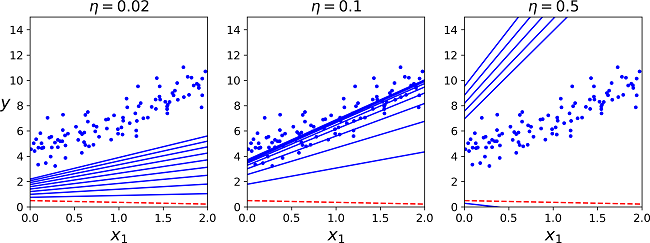
</p>

On the left, the learning rate is too low: the algorithm will eventually reach the solu tion, but it will take a long time. In the middle, the learning rate looks pretty good: in just a few iterations, it has already converged to the solution. On the right, the learn ing rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step

To find a good learning rate, you can use grid search. However, you may want to limit the number of iterations so that grid search can eliminate models that take too long to converge

You may wonder how to set the number of iterations. If it is too low, you will still be far away from the optimal solution when the algorithm stops, but if it is too high, you will waste time while the model parameters do not change anymore. A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny number ϵ (called the tolerance)—because this happens when Gradient Descent has (almost) reached the minimum

## Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large

At the opposite extreme, Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average

Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the final parameter values are good, but not optimal

<p align='center'>
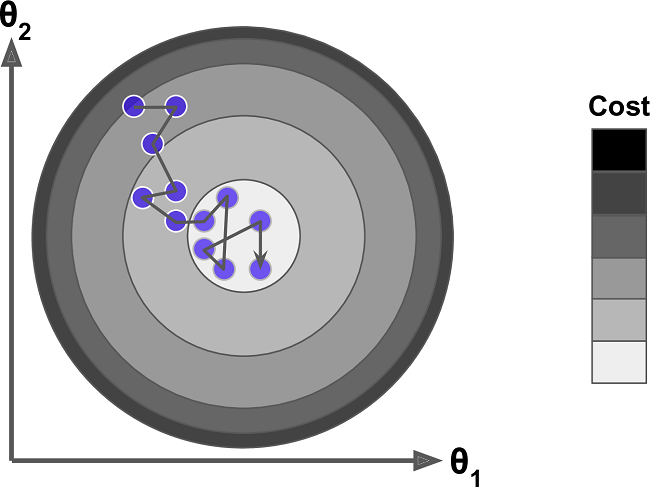
</p>

When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does

Therefore randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate

The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum

The function that determines the learning rate at each iteration is called the learning schedule. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early

This code implements Stochastic Gradient Descent using a simple learning schedule

In [ ]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initalization

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

By convention we iterate by rounds of m iterations; each round is called an epoch. While the Batch Gradient Descent code iterated 1,000 times through the whole train ing set, this code goes through the training set only 50 times and reaches a fairly good solution

In [ ]:
theta

array([[3.48368164],
       [3.44518083]])

Figure below shows the first 20 steps of training (notice how irregular the steps are)



<p align='center'>
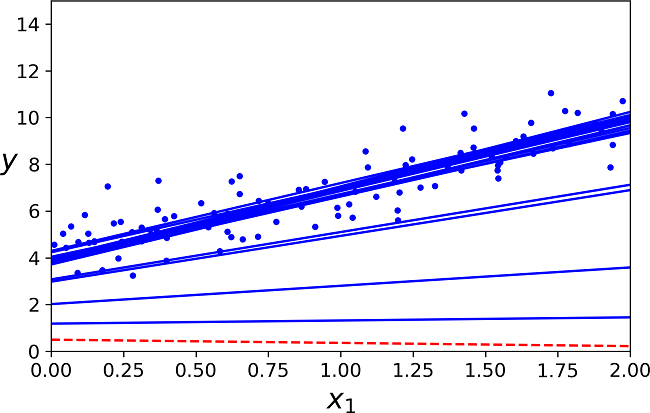
</p>

Note that since instances are picked randomly, some instances may be picked several times per epoch while others may not be picked at all. If you want to be sure that the algorithm goes through every instance at each epoch, another approach is to shuffle the training set (making sure to shuffle the input features and the labels jointly), then go through it instance by instance, then shuffle it again, and so on. However, this generally converges more slowly

To perform Linear Regression using SGD with Scikit-Learn, you can use the SGDRegressor class, which defaults to optimizing the squared error cost function 

The following code runs for maximum 1000 epochs or until the loss drops (max_iter=1000) by less than 1e-3 during one epoch (tol=1e-3), starting with a learning rate of 0.1 (eta0=0.1), using the default learning schedule (different from the preceding one), and it does not use any regularization

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

Once again, you find a solution quite close to the one returned by the Normal Equa
tion

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.41500632]), array([3.42284273]))

## Mini-batch Gradient Descent

At each step, instead of computing the gradients based on the full train ing set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini batch GD computes the gradients on small random sets of instances called mini batches. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs

The algorithm’s progress in parameter space is less erratic than with SGD, especially with fairly large mini-batches. As a result, Mini-batch GD will end up walking around a bit closer to the minimum than SGD. But, on the other hand, it may be harder for it to escape from local minima

Figure below shows the paths taken by the three Gradient Descent algorithms in parameter space during training. They all end up near the minimum, but Batch GD’s path actually stops at the minimum, while both Stochastic GD and Mini-batch GD continue to walk around

However, don’t forget that Batch GD takes a lot of time to take each step, and Stochas tic GD and Mini-batch GD would also reach the minimum if you used a good learn ing schedule

<p align='center'>
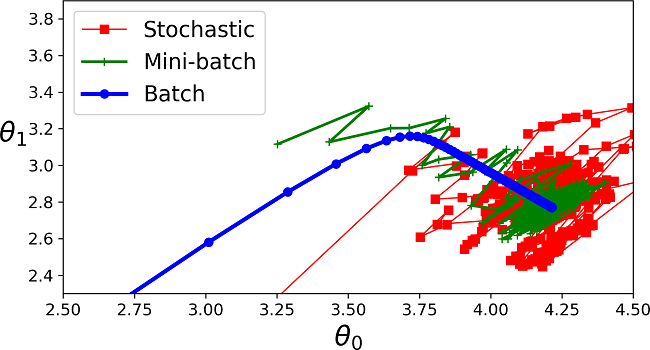
</p>

Let’s compare the algorithms we’ve discussed so far for Linear Regression8 (recall that m is the number of training instances and n is the number of features)

<p align='center'>
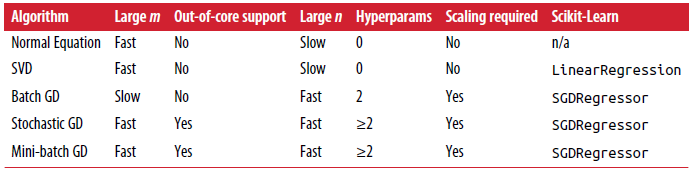
</p>

# Polynomial Regression

What if your data is actually more complex than a simple straight line? Surprisingly, you can actually use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression

Let’s look at an example. First, let’s generate some nonlinear data, based on a simple quadratic equation

Text(0, 0.5, '$y$')

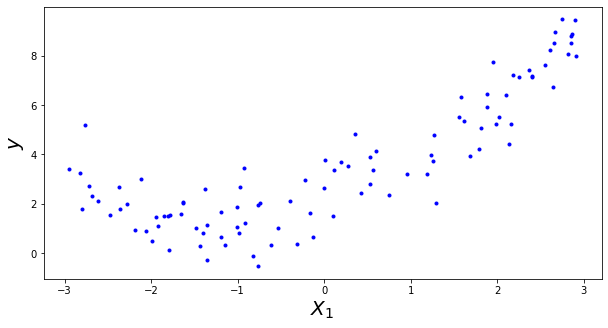

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.figure(figsize=(10, 5))
plt.plot(X, y, 'b.')
plt.xlabel('$X_1$', fontsize=20)
plt.ylabel('$y$', fontsize=20)

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square (2nd-degree polynomial) of each feature in the training set as new features (in this case there is just one feature)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.98249594])

In [ ]:
X_poly[0]

array([-0.98249594,  0.96529828])

X_poly now contains the original feature of X plus the square of this feature. Now you can fit a LinearRegression model to this extended training data 

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.04618948]), array([[1.08025092, 0.44687191]]))

(-3.0, 3.0, 0.0, 10.0)

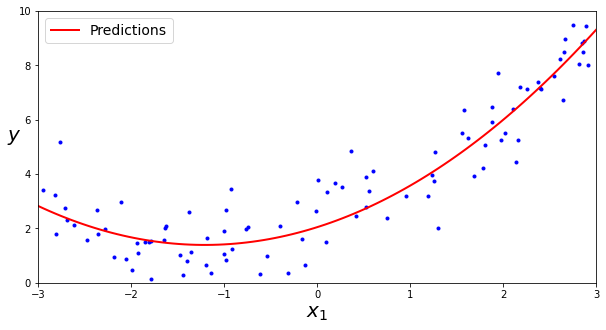

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.figure(figsize=(10, 5))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$y$", rotation=0, fontsize=20)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

The model estimates $$\hat y = 0.56 {x^2_1} + 0.93 x_1 +1.78 $$

when in fact the original function was 
$$ y = 0.5{x^2_1} + 1.0 x_1 + 2.0 + \text{Gaussian noise} $$

Note that when there are multiple features, Polynomial Regression is capable of finding relationships between features (which is something a plain Linear Regression model cannot do). This is made possible by the fact that PolynomialFeatures also
adds all combinations of features up to the given degree

For example, if there were two features $a$ and $b$, PolynomialFeatures with would not only add the degree=3 features $a^2$, $a^3$, $b^2$, and $b^3$, but also the combinations $ab$, $a^2 b$, and $ab^2$



# Learning Curves

If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with plain Linear Regression

For example, Figure below applies a 300-degree polynomial model to the preceding training data, and compares the result with a pure linear model and a quadratic model (2nd-degree polynomial). Notice how the 300-degree polynomial model wiggles around to get as close as possi ble to the training instances

<p align='center'>
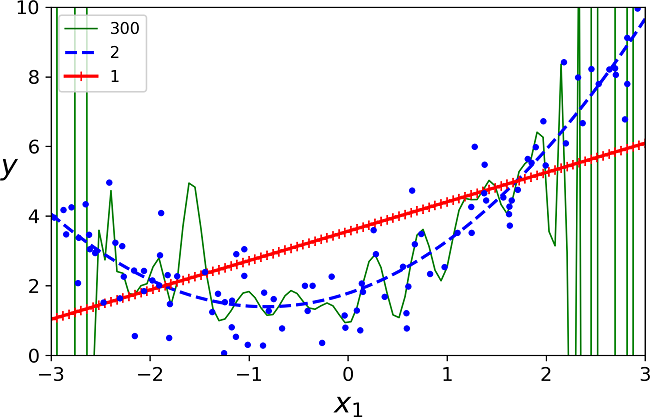
</p>

Of course, this high-degree Polynomial Regression model is severely overfitting the training data, while the linear model is underfitting it. The model that will generalize best in this case is the quadratic model. It makes sense since the data was generated using a quadratic model, but in general you won’t know what function generated the data, so how can you decide how complex your model should be? How can you tell that your model is overfitting or underfitting the data?

In Chapter 2 you used cross-validation to get an estimate of a model’s generalization performance. If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it per forms poorly on both, then it is underfitting. This is one way to tell when a model is too simple or too complex

Another way is to look at the learning curves: these are plots of the model’s perfor mance on the training set and the validation set as a function of the training set size (or the training iteration)

To generate the plots, simply train the model several times on different sized subsets of the training set. The following code defines a function that plots the learning curves of a model given some training data

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [] , []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.figure(figsize=(10,5))
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
  plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
  plt.xlabel('Training Set Size', fontsize=15)
  plt.ylabel('RMSE', fontsize=15)
  plt.xlim(0,80)
  plt.ylim(0,3)
  plt.legend(['train', 'val'])

Let’s look at the learning curves of the plain Linear Regression model

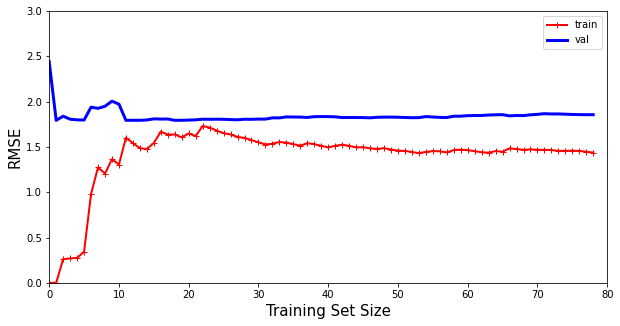

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

First, let’s look at the performance on the training data: when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data per fectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instan ces to the training set doesn’t make the average error much better or worse

Now let’ look at the performance of the model on the validation data. When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then as the model is shown more training examples, it learns and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve

These learning curves are typical of an underfitting model. Both curves have reached a plateau; they are close and fairly high

Now let’s look at the learning curves of a 10th-degree polynomial model on the same data

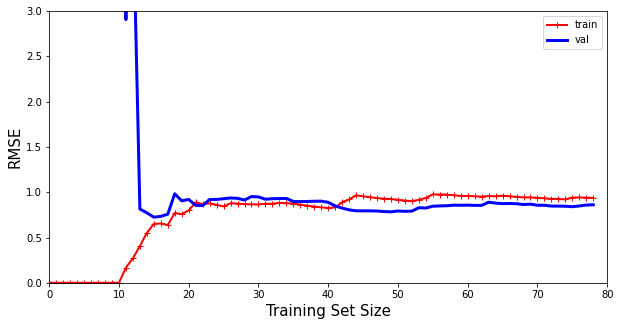

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
        ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

These learning curves look a bit like the previous ones, but there are two very impor tant differences

* The error on the training data is much lower than with the Linear Regression model

* There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hall mark of an overfitting model. However, if you used a much larger training set, the two curves would continue to get closer

The Bias/Variance Tradeoff

* Bias

This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data

* Variance

This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree pol ynomial model) is likely to have high variance, and thus to overfit the training data

* Irreducible error

This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers)

* Bias/Variance Tradeoff

Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance. This is why it is called a tradeoff


# Regularized Linear Models

A good way to reduce overfitting is to regularize the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data. For example, a simple way to regularize a polynomial model is to reduce the number of polynomial degrees

For a linear model, regularization is typically achieved by constraining the weights of the model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weights

## Ridge Regression

Ridge Regression (also called Tikhonov regularization) is a regularized version of Lin ear Regression: a regularization term equal to $\alpha \sum^n_{i=1} \theta^2_i $ is added to the cost function

This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to evaluate the model’s performance using the unregularized performance measure



The hyperparameter $α$ controls how much you want to regularize the model. If $α = 0$ then Ridge Regression is just Linear Regression. If $α$ is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.

Ridge Regression cost function

$$ J(\theta) = MSE(\theta) + \alpha {1\over 2} \sum^n_{i=1} \theta^2_i $$

Note that the bias term $\theta_0$ is not regularized (the sum starts at $i = 1$, not $0$). If we define w as the vector of feature weights (θ1 to θn), then the regularization term is simply equal to ${1 \over 2} (|| w ||_2)^2 $, where $ ||w||_2$ represents the $l_2 $ norm of the weight vector

For Gradient Descent, just add $αw$ to the MSE gradient vector

It is important to scale the data (e.g., using a StandardScaler) before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models

Figure below shows several Ridge models trained on some linear data using different $α$ value

<p align='center'>
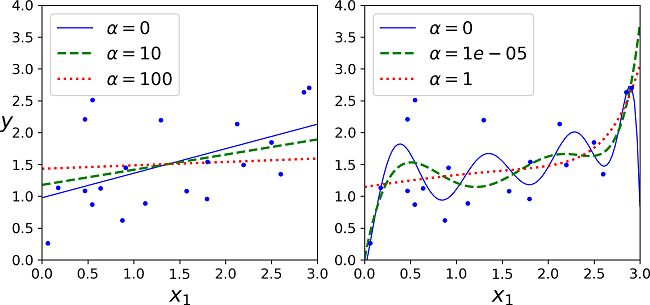
</p>

On the left, plain Ridge models are used, leading to linear predictions. On the right, the data is first expanded using PolynomialFeatures(degree=10), then it is scaled using a StandardScaler, and finally the Ridge models are applied to the resulting features: this is Polynomial Regression with Ridge regularization. Note how increasing α leads to flatter (i.e., less extreme, more reasonable) predictions; this reduces the model’s variance but increases its bias

As with Linear Regression, we can perform Ridge Regression either by computing a closed-form equation or by performing Gradient Descent. The pros and cons are the same

Equation below shows the closed-form solution (where A is the $(n + 1) x (n + 1)$ identity matrix except with a 0 in the top-left cell, corresponding to the bias term)

Ridge Regression closed-form solution

$$\hat \theta = (X^T X + \alpha A)^{-1} X^T y $$

Here is how to perform Ridge Regression with Scikit-Learn using a closed-form solution

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [ ]:
ridge_reg.predict([[1.5]])

array([[5.28159766]])

And using Stochastic Gradient Descent

In [ ]:
sdg_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sgd_reg.predict([[1.5]])

array([5.54069112])

The hyperparameter sets the type of regularization term to use. Specifying penalty indicates that you want SGD to add a regularization term to the cost function "l2" equal to half the square of the $l_2$ norm of the weight vector: this is simply Ridge
Regression

## Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the $l_1$ norm
of the weight vector instead of half the square of the $l_2$ norm

Lasso Regression cost function

$$ J(\theta) = MSE(\theta) + \alpha \sum^n_{i=1} |\theta_i| $$

<p align='center'>
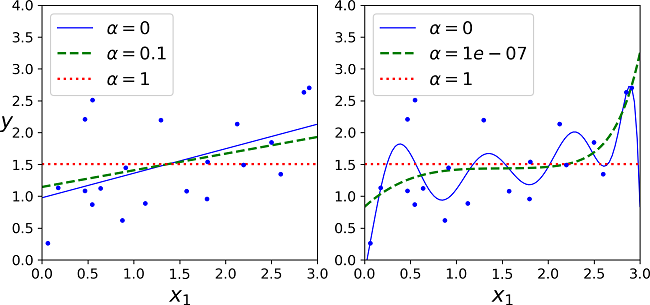
</p>

An important characteristic of Lasso Regression is that it tends to completely elimi nate the weights of the least important features (i.e., set them to zero)

For example, the dashed line in the right plot on Figure above (with $\alpha = 10^{-7}$) looks quadratic, almost linear: all the weights for the high-degree polynomial features are equal to zero

In other words, Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights)




You can get a sense of why this is the case by looking at Figure below

on the top-left plot, the background contours (ellipses) represent an unregularized MSE cost function ($α = 0$), and the white circles show the Batch Gradient Descent path with that cost function

The foreground contours (diamonds) represent the $l_1$ penalty, and the triangles show the BGD path for this penalty only ($α → ∞$). Notice how the path first reaches $θ_1 = 0$, then rolls down a gutter until it reaches $θ_2 = 0$

On the top-right plot, the contours represent the same cost function plus an $l_1$ penalty with $α = 0.5$. The global minimum is on the $θ_2 = 0$ axis. BGD first reaches $θ_2 = 0$, then rolls down the gutter until it reaches the global minimum

The two bottom plots show the same thing but uses an $l_2$ penalty instead. The regularized minimum is closer to $θ = 0$ than $l_2$ the unregularized minimum, but the weights do not get fully eliminated




<p align='center'>
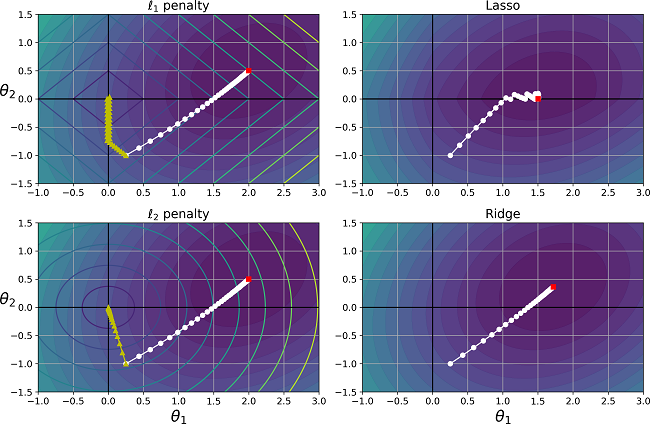
</p>

On the Lasso cost function, the BGD path tends to bounce across the gutter toward the end. This is because the slope changes abruptly at $θ_2 = 0$. You need to gradually reduce the learning rate in order to actually converge to the global minimum

The Lasso cost function is not differentiable at $θ_i = 0$ (for i = 1, 2, ..., n), but Gradient Descent still works fine if you use a subgradient vector $g$ instead when any $θ_i = 0$

Equation below1 shows a subgradient vector equation you can use for Gradient Descent with the Lasso cost function

Lasso Regression subgradient vector

$$ g(\theta,J) = \nabla MSE(\theta) + \alpha  \begin{pmatrix} \text{sign}(\theta_1) \\ \text{sign}(\theta_2) \\ \vdots \\ \text{sign}(\theta_n)
\end{pmatrix} \text{where sign} (\theta_i) = \begin{cases} -1 \text{ if } \theta_i < 0 \\ 0 \text{ if } \theta_i = 0 \\ +1 \text{ if } \theta_i > 0\end{cases} $$

Here is a small Scikit-Learn example using the Lasso class. Note that you could instead use an  SGDRegressor(penalty="l1")

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso_reg.predict([[1.5]])

array([5.24263403])

## Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r

When $r = 0$, Elastic Net is equivalent to Ridge Regression, and when $r = 1$, it is equivalent to Lasso Regression

Elastic Net cost function

$$J(\theta) = MSE (\theta) + r \alpha \sum^n_{i=1} |\theta_i | + {1-r \over 2} \alpha \sum^n_{i=1} \theta^2_i $$

So when should you use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression

Ridge is a good default, but if you suspect that only a few features are actually useful, you should pre fer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to zero

aIn general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated

Here is a short example using Scikit-Learn’s ElasticNet (l1_ratio corresponds to the mix ratio r)

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
elastic_net.predict([[1.5]])

array([5.23906689])

## Early Stopping

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping

Figure below shows a complex model (in this case a high-degree Polynomial Regression model) being trained using Batch Gradient Descent. As the epochs go by, the algorithm learns and its prediction error (RMSE) on the training set naturally goes down, and so does its prediction error on the validation set.

However, after a while the validation error stops decreasing and actually starts to go back up. This indicates that the model has started to overfit the training data

With early stop ping you just stop training as soon as the validation error reaches the minimum. It is such a simple and efficient regularization technique that Geoffrey Hinton called it a “beautiful free lunch.”


<p align='center'>
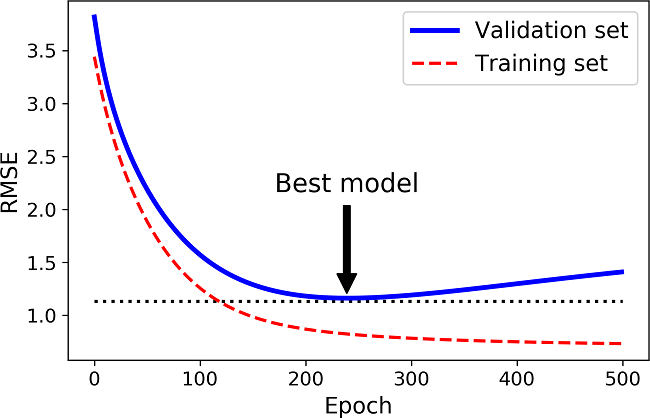
</p>

With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not. One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better), then roll back the model parameters to the point where the validation error was at a minimum

Here is a basic implementation of early stopping

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# wrapped the code into early_stopping function so that it does not get executed
def early_stopping():
  #prepare the data
  poly_scaler = Pipeline([
          ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
          ('std_scaler', StandardScaler())               
      ])
  X_train_poly_scaled = poly_scaler.fit_transform(X_train)
  X_val_poly_scaled = poly_scaler.transform(X_val)

  sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                         penalty=None, learning_rate='constant', eta0=0.0005)
  minimum_val_error = float('inf')
  best_epoch = None
  best_model = None
  for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
      minimum_val_error = val_error
      best_epoch = epoch
      best_model = clone(sgd_reg)

Note that with warm_start=True, when the fit() method is called, it just continues training where it left off instead of restarting from scratch

# Logistic Regression

As we discussed in Chapter 1, some regression algorithms can be used for classification as well (and vice versa)

Logistic Regression (also called Logit Regression) is com monly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?)

If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), or else it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier

## Estimating Probabilities

Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result

Logistic Regression model estimated probability (vectorized form)

$$\hat p = h_\theta (x) = \sigma (x^T \theta) $$

The logistic—noted $\sigma (.)$—is a sigmoid function (i.e., S-shaped) that outputs a number between 0 and 1

Logistic function

$$ \sigma (t) = {1 \over 1 + exp^{(-t)}}$$

<p align='center'>
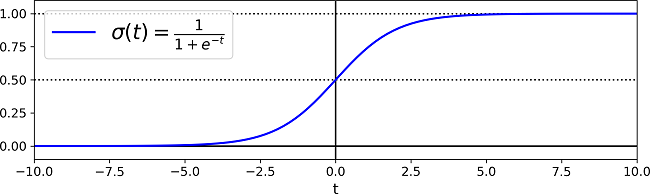
</p>

Once the Logistic Regression model has estimated the probability $\hat p = h_\theta (x)$ that an instance $x$ belongs to the positive class, it can make its prediction %\hat y% easily

Logistic Regression model prediction

$$\hat y = \begin{cases} 0 \text{ if } \hat p < 0.5 \\ 1 \text{ if } \hat p \geq 0.5 \end{cases} $$

Notice that $\sigma (t) < 0.5 $ when $t < 0 $, and $\sigma (t) \geq 0.5 $ when $t \geq 0 $, so a Logistic Regression model predicts 1 if $x^T \theta $ is positive, and 0 if it is negative

The score t is often called the logit: this name comes from the fact that the logit function, defined as $ \text{logit}(p) = log({p\over 1-p}) $, is the inverse of the logistic function

Indeed, if you compute the logit of the estimated probability $p$, you will find that the result is $t$

The logit is also called the log-odds, since it is the log of the ratio between the estimated probability for the positive class and the estimated probability for the negative class

## Training and Cost Function

Good, now you know how a Logistic Regression model estimates probabilities and makes predictions. But how is it trained? The objective of training is to set the parameter vector $\theta$ so that the model estimates high probabilities for positive instances ($y = 1$) and low probabilities for negative instances ($y = 0$)

This idea is captured by the cost function shown in Equation below for a single training instance x

Cost function of a single training instance

$$ c(\theta) = \begin{cases} -log(\hat p) \text{     if }  y = 1  \\ -log(1 - \hat p) \text{ if }  y = 0  \end{cases} $$

This cost function makes sense because – log(t) grows very large when t approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1 for a negative instance

On the other hand, – log(t) is close to 0 when t is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance or close to 1 for a positive instance, which is precisely what we want

The cost function over the whole training set is simply the average cost over all training instances. It can be written in a single expression (as you can verify easily), called the log loss

Logistic Regression cost function (log loss)

$$ J(\theta) = -{1 \over m} \sum^m_{i = 1} [y^{(i)} log (\hat p ^ {(i)} ) + ( 1 - y^{(i)})log (1 - {\hat p ^ {(i)}})] $$

The bad news is that there is no known closed-form equation to compute the value of $\theta$ that minimizes this cost function (there is no equivalent of the Normal Equation)

But the good news is that this cost function is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum

The partial derivatives of the cost
function with regards to the $j^{th}$ model parameter $\theta_j$ is given by

Logistic cost function partial derivatives

$${\delta \over \delta \theta_j} J(\theta) = \frac 1m \sum^m_{i = 1} (\sigma (\theta^T x^{(i)}) - y^{(i)}) x^{(i)}_j  $$

For each instance it computes the prediction error and multiplies it by the jth feature value, and then it computes the average over all training instances

Once you have the gradient vector containing all the partial derivatives you can use it in the Batch Gradient Descent algorithm

For Stochastic GD you would of course just take one instance at a time, and for Mini-batch GD you would use a mini-batch at a time

## Decision Boundaries

Let’s use the iris dataset to illustrate Logistic Regression. This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica

<p align='center'>
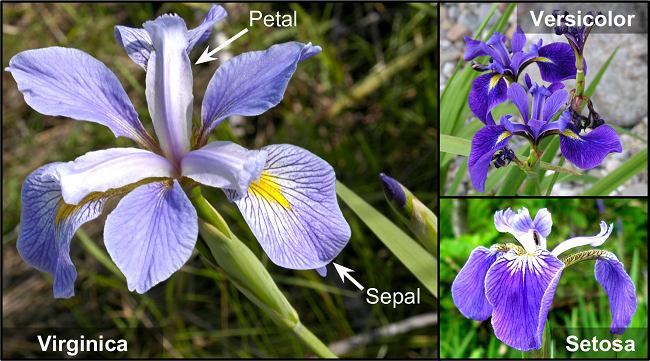
</p>

Let’s try to build a classifier to detect the Iris-Virginica type based only on the petal width feature. First let’s load the data

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [ ]:
X = iris['data'][:, 3:] # petal width
y = (iris['target'] == 2).astype(np.int) # 1 If Iris-Virginica, else 0

Now let’s train a Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Let’s look at the model’s estimated probabilities for flowers with petal widths varying from 0 to 3 cm

/usr/local/lib/python3.7/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


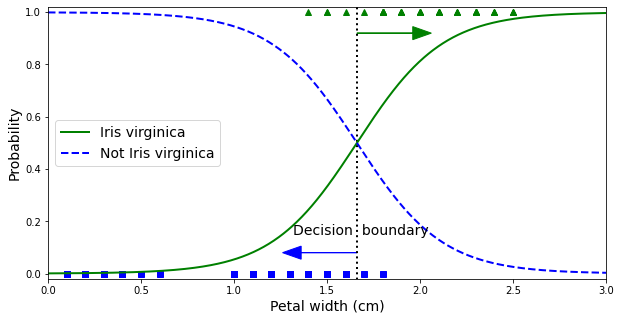

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(10, 5))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

The petal width of Iris-Virginica flowers (represented by triangles) ranges from 1.4 cm to 2.5 cm, while the other iris flowers (represented by squares) generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice that there is a bit of overlap

Above about 2 cm the classifier is highly confident that the flower is an Iris- Virginica (it outputs a high probability to that class), while below 1 cm it is highly confident that it is not an Iris-Virginica (high probability for the “Not Iris-Virginica” class)

In between these extremes, the classifier is unsure. However, if you ask it to predict the class (using the method rather than the predict() predict_proba() method), it will return whichever class is the most likely

Therefore, there is a decision boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal width is higher than 1.6 cm, the classifier will predict that the flower is an Iris- Virginica, or else it will predict that it is not (even if it is not very confident)






In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

Figure below shows the same dataset but this time displaying two features: petal width and length





<p align='center'>
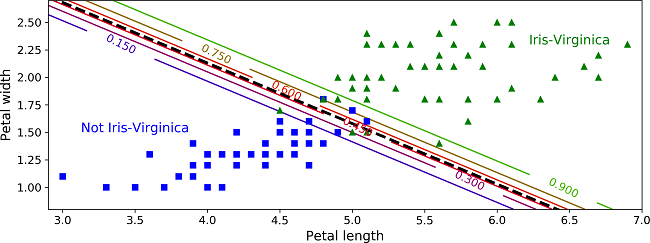
</p>

Once trained, the Logistic Regression classifier can estimate the probability that a new flower is an Iris-Virginica based on these two features

The dashed line represents the points where the model estimates a 50% probability: this is the model’s decision boundary. Note that it is a linear boundary

Each parallel line represents the points where the model outputs a specific probability, from 15% (bottom left) to 90% (top right). All the flowers beyond the top-right line have an over 90% chance of being Iris-Virginica according to the model

Just like the other linear models, Logistic Regression models can be regularized using $l_1$ or $l_2$ penalties. Scitkit-Learn actually adds an $l_2$ penalty by default

The hyperparameter controlling the regularization strength of a Scikit-Learn LogisticRegression model is not (as in other alpha linear models), but its inverse: C. The higher the value of C, the less the model is regularized

## Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called Softmax Regression, or Multinomial Logistic Regression

The idea is quite simple: when given an instance $x$ the Softmax Regression model first computes a score $s_k (x)$ for each class $k$, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores

The equation to compute $s_k (x)$ should look familiar, as it is just like the equation for Linear Regression prediction


Softmax score for class k

$$s_k (x) = x^T \theta^{(k)}$$

Note that each class has its own dedicated parameter vector $\theta^{(k)}$. All these vectors are
typically stored as rows in a parameter matrix $\Theta$

Once you have computed the score of every class for the instance $x$, you can estimate the probability $\hat p_k$ that the instance belongs to class $k$ by running the scores through the softmax function

It computes the exponential of every score, then normalizes them (dividing by the sum of all the exponentials). The scores are generally called logits or log-odds (although they are actually unnormalized log odds)

Softmax function

$$ \hat p_k = \sigma (s(x))_k = {{exp(s_k (x))}\over{\sum^k_{j=1} exp (s_j(x))}} $$

* $K$ is the number of classes

* $s(x)$ is a vector containing the scores of each class for the instance $x$

* $\sigma (s(x))_k$ is the estimated probability that the instance $x$ belongs to class $k$ given the scores of each class for that instance

Just like the Logistic Regression classifier, the Softmax Regression classifier predicts the class with the highest estimated probability (which is simply the class with the highest score)

Softmax Regression classifier prediction

$$ \hat y = argmax_k  \text{ } \sigma (s(x))_k = argmax_k \text{ } s_k(x) = argmax_k \text{ } ((\theta^{(k)})^T x) $$

* The argmax operator returns the value of a variable that maximizes a function. In this equation, it returns the value of $k$ that maximizes the estimated probability $\sigma(s(x))_k$

The Softmax Regression classifier predicts only one class at a time (i.e., it is multiclass, not multioutput) so it should be used only with mutually exclusive classes such as different types of plants. You cannot use it to recognize multiple people in one picture

Now that you know how the model estimates probabilities and makes predictions, let’s take a look at training. The objective is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes)

Minimizing the cost function shown in Equation below, called the cross entropy, should lead to this objective because it penalizes the model when it estimates a low probability for a target class

Cross entropy is frequently used to measure how well a set of estimated class probabilities match the target classes

Cross entropy cost function

$$ J(\Theta) = -\frac 1m \sum^m_{i=1} \sum^K_{k=1} y^{(i)}_k log(\hat p^{(i)}_k) $$

* $y^{(i)}_k$ is the target probability that the $i^{th}$ instance belongs to class $k$. In general, it is either equal to 1 or 0, depending on whether the instance belongs to the class or not

The gradient vector of this cost function with regards to $\theta^{(k)}$ is given by

Cross entropy gradient vector for class k

$$\nabla_{\theta^{(k)}} J(\Theta) = \frac 1m \sum^m_{i = 1} (\hat p^{(i)}_k - y^{(i)}_k) x^{(i)} $$

Now you can compute the gradient vector for every class, then use Gradient Descent (or any other optimization algorithm) to find the parameter matrix $\Theta$ that minimizes the cost function



Let’s use Softmax Regression to classify the iris flowers into all three classes. Scikit-Learn’s LogisticRegression uses one-versus-all by default when you train it on more than two classes, but you can set the multi_class hyperparameter to "multinomial" to switch it to Softmax Regression instead

You must also specify a solver that sup ports Softmax Regression, such as the solver"lbfgs"

It also applies $l_2$ regularization by default, which you can control using the hyperparameter C


In [ ]:
X = iris['data'][:, (2, 3)] #petal length, petal width
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

So the next time you find an iris with 5 cm long and 2 cm wide petals, you can ask your model to tell you what type of iris it is, and it will answer Iris-Virginica (class 2) with 94.2% probability (or Iris-Versicolor with 5.8% probability)

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

Figure below shows the resulting decision boundaries, represented by the background colors. Notice that the decision boundaries between any two classes are linear

<p align='center'>
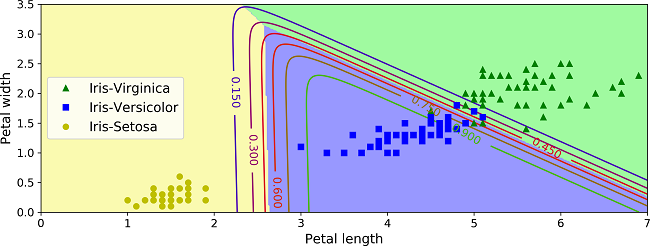
</p>

The figure also shows the probabilities for the Iris-Versicolor class, represented by the curved lines (e.g., the line labeled with 0.450 represents the 45% probability bound ary)

Notice that the model can predict a class that has an estimated probability below 50%. For example, at the point where all decision boundaries meet, all classes have an equal estimated probability of 33%